importing all the package we need for the computation:

In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
pd.set_option('precision', 2)

Data set 1: Bike sharing data set (imported form Irvine machine learning resource)

read the data file

In [7]:
bike = pd.read_csv("day.csv", index_col = False)
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.20,0.23,0.52,0.09,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.20,0.21,0.50,0.17,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.17,0.16,0.54,0.27,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.14,0.12,0.43,0.36,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.15,0.15,0.48,0.22,41,1280,1321


The hyperparameter we are using here are the different variables agaisnt count, thus plot temp against count, humidity against cout, and windspeed agaisnt count. It should be a linear regression

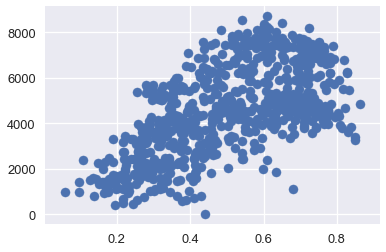

In [8]:
plt.scatter(bike['temp'], bike['cnt'])

seperate the data in to train set and test set with a test size of 220

In [9]:
from sklearn.model_selection import train_test_split

test_size = 220

t_train, t_test, h_train, h_test, w_train, w_test, cnt_train, cnt_test = train_test_split(bike[['temp']],bike[['hum']],bike[['windspeed']], bike['cnt'], test_size=test_size, random_state=0)
print(len(t_train))
print(len(t_test))

511
220


functions of computing mse cost and the cross validation error.
note we made changes to the cross validation function due to difference data type may occur in this project

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

def mse_cost(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

def compute_CV_error(model, X_train, Y_train):
    kf = KFold(n_splits=5)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train[train_idx], X_train[valid_idx]
        if isinstance(Y_train, pd.Series):
            split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]
        else:
            split_Y_train, split_Y_valid = Y_train[train_idx], Y_train[valid_idx]


        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        error = mse_cost(split_Y_valid, model.predict(split_X_valid))
        
        # Add this split's error to a list with all of the errors
        validation_errors.append(error)
    
    #average all the validation errors
    return np.mean(validation_errors)

train a linear regression classifier for each featurized dataset and perform cross-validation on them with using for loop to run through each of the variable.

In [11]:
train_df = [t_train, w_train, h_train]
train_ar = [i.values for i in train_df]

cross_validation_errors = [compute_CV_error(LinearRegression(fit_intercept=True), i, cnt_train) for i in train_ar]
cross_validation_errors
# we found that temp has the strongest correlation with cnt

[2167077.3886635723, 3346401.909556358, 3584425.242372493]

find the best model and compute the training error, validation error and test error

In [12]:
best_model = LinearRegression(fit_intercept=True).fit(train_ar[0], cnt_train)
print(best_model.coef_)
print(best_model.intercept_)

training_error = mse_cost(best_model.predict(train_ar[0]), cnt_train)
validation_error = cross_validation_errors[0]
validation_error
test_error = mse_cost(best_model.predict(t_test.values), cnt_test)

print('Degree 1')
print(f'  Training error: {training_error:0.5f}')
print(f'Validation error: {validation_error:0.5f}')
print(f'      Test error: {test_error:0.5f}')

[6451.77]
1326.6364291419632
Degree 1
  Training error: 2149231.55919
Validation error: 2167077.38866
      Test error: 2562318.55283


Best model: LinearRegression between temperature(t) and cnt(c)
cnt = 6451.77temp + 1326.6364291419632

Plot the data with the model we found

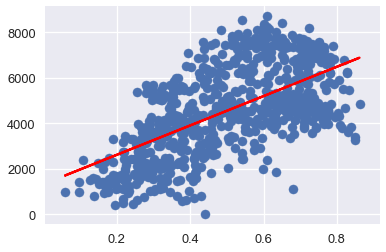

In [13]:
import seaborn as sns
plt.scatter(bike['temp'], bike['cnt'])
#sns.regplot(bike['temp'],bike['cnt'], color = 'b')

plt.plot(t_test.values, 6451.77*t_test.values + 1326.6364291419632, '-r')  

DATA SET 2: Real Estate (imported form Irvine machine learning resource)

read the data file

In [18]:
estate = pd.read_csv("estate.csv", index_col = False)
estate

,No,X1,X2,X3,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.92,32.0,84.88,10,24.98,121.54,37.9
1,2,2012.92,19.5,306.59,9,24.98,121.54,42.2
2,3,2013.58,13.3,561.98,5,24.99,121.54,47.3
3,4,2013.50,13.3,561.98,5,24.99,121.54,54.8
4,5,2012.83,5.0,390.57,5,24.98,121.54,43.1
5,6,2012.67,7.1,2175.03,3,24.96,121.51,32.1
6,7,2012.67,34.5,623.47,7,24.98,121.54,40.3
7,8,2013.42,20.3,287.60,6,24.98,121.54,46.7
8,9,2013.50,31.7,5512.04,1,24.95,121.48,18.8
9,10,2013.42,17.9,1783.18,3,24.97,121.51,22.1


The hyperparameter we are using here are the different variables agaisnt Y1, house price per unit area, thus plot X3 against house price per unit area

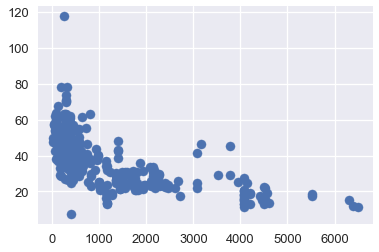

In [19]:
plt.scatter(estate['X3'], estate['Y house price of unit area'])

Linearize X3 data

In [20]:
estate['X3'] = estate['X3'] ** (-0.1)
estate

,No,X1,X2,X3,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.92,32.0,0.64,10,24.98,121.54,37.9
1,2,2012.92,19.5,0.56,9,24.98,121.54,42.2
2,3,2013.58,13.3,0.53,5,24.99,121.54,47.3
3,4,2013.50,13.3,0.53,5,24.99,121.54,54.8
4,5,2012.83,5.0,0.55,5,24.98,121.54,43.1
5,6,2012.67,7.1,0.46,3,24.96,121.51,32.1
6,7,2012.67,34.5,0.53,7,24.98,121.54,40.3
7,8,2013.42,20.3,0.57,6,24.98,121.54,46.7
8,9,2013.50,31.7,0.42,1,24.95,121.48,18.8
9,10,2013.42,17.9,0.47,3,24.97,121.51,22.1


plot modified X3 against house price per unit area

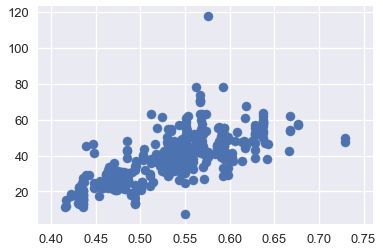

In [21]:
plt.scatter(estate['X3'], estate['Y house price of unit area'])

plot modified X5 against house price per unit area

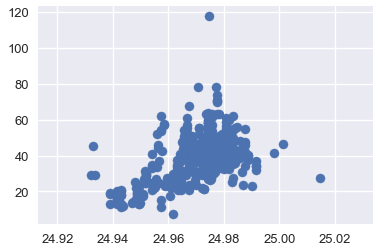

In [22]:
plt.scatter(estate['X5 latitude'], estate['Y house price of unit area'])

plot modified X2 against house price per unit area

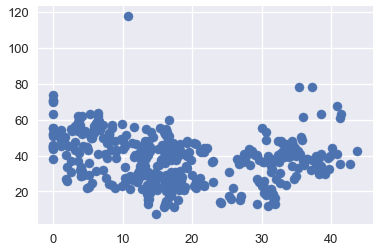

In [23]:
plt.scatter(estate['X2'], estate['Y house price of unit area'])

seperate the data in to train set and test set with a test size of 124

In [24]:
from sklearn.model_selection import train_test_split

test_size_2 = 124
X2_train, X2_test, X3_train, X3_test, X5_train, X5_test, p_train, p_test = train_test_split(estate[['X2']], estate[['X3']],estate[['X5 latitude']], estate['Y house price of unit area'], test_size=test_size_2, random_state=0)
print(len(X2_train))
print(len(X2_test))

290
124


train a linear regression classifier for each featurized dataset and perform cross-validation on them with using for loop to run through each of the variable.

In [25]:
train_df_2 = [X2_train, X3_train, X5_train]
train_ar_2= [i.values for i in train_df_2]
cross_validation_errors_2 = [compute_CV_error(LinearRegression(fit_intercept=True), i, p_train) for i in train_ar_2]
cross_validation_errors_2
# we found that X3 has the strongest correlation with price

[181.35635632636323, 95.33689571170734, 136.17291364489296]

find the best model and compute the training error, validation error and test error

In [26]:
best_model_2 = LinearRegression(fit_intercept=True).fit(train_ar_2[1], p_train)
print(best_model_2.coef_)
print(best_model_2.intercept_)

training_error_2 = mse_cost(best_model_2.predict(train_ar_2[1]), p_train)
validation_error_2 = cross_validation_errors_2[1]
validation_error_2
test_error_2 = mse_cost(best_model_2.predict(X3_test.values), p_test)

print('Degree 1')
print(f'  Training error: {training_error_2:0.5f}')
print(f'Validation error: {validation_error_2:0.5f}')
print(f'      Test error: {test_error_2:0.5f}')

[158.6]
-45.94033631188673
Degree 1
  Training error: 94.20832
Validation error: 95.33690
      Test error: 73.92946


Best model: LinearRegression between X3 and Y  
Y = 158.6 X3 - 45.94033631188673  
Plot the data with the model we found

(0.4, 0.65)

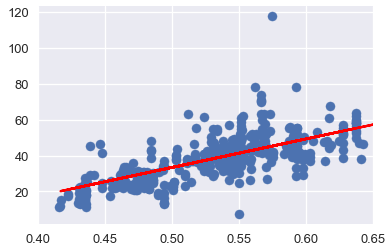

In [27]:
import seaborn as sns
plt.scatter(estate['X3'], estate['Y house price of unit area'])
plt.plot(X3_test.values, 158.6*X3_test.values + -45.94033631188673, '-r') 
plt.xlim(0.4,0.65)

DATA SET 3 DIABETES (An sklearn data set)

import dataset from sklearn

In [31]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.04,  0.05,  0.06, ..., -0.  ,  0.02, -0.02],
        [-0.  , -0.04, -0.05, ..., -0.04, -0.07, -0.09],
        [ 0.09,  0.05,  0.04, ..., -0.  ,  0.  , -0.03],
        ...,
        [ 0.04,  0.05, -0.02, ..., -0.01, -0.05,  0.02],
        [-0.05, -0.04,  0.04, ...,  0.03,  0.04, -0.03],
        [-0.05, -0.04, -0.07, ..., -0.04, -0.  ,  0.  ]]),
 'target': array([151.,  75., 141., ..., 132., 220.,  57.]),
 'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  

seperate the data in to train set and test set with a test size of 130

In [32]:
test_size_d = 130

prog = diabetes.target #progression of illness
bmi = diabetes.data[:, np.newaxis, 2] #body mass index
abp = diabetes.data[:, np.newaxis, 3] #average blood pressure

prog_train, prog_test = train_test_split(prog, test_size=test_size_d, random_state=0)
bmi_train, bmi_test = train_test_split(bmi, test_size=test_size_d, random_state=0)
abp_train, abp_test = train_test_split(abp, test_size=test_size_d, random_state=0)


train a linear regression classifier for each featurized dataset and perform cross-validation on them with using for loop to run through each of the variable.

In [33]:
train = [bmi_train, abp_train]
cross_validation_errors_d = [compute_CV_error(LinearRegression(fit_intercept=True), i, prog_train) for i in train]
cross_validation_errors_d
# we found that bmi has the strongest correlation with progression of illness

[3940.234705026681, 4966.533433088722]

find the best model and compute the training error, validation error and test error

In [34]:
best_model_d = LinearRegression(fit_intercept=True).fit(train[0], prog_train)
print(best_model_d.coef_)
print(best_model_d.intercept_)

training_error_d = mse_cost(best_model_d.predict(train[0]), prog_train)
validation_error_d = cross_validation_errors_d[0]
test_error_d = mse_cost(best_model_d.predict(bmi_test), prog_test)

print('Degree 1')
print(f'  Training error: {training_error_d:0.5f}')
print(f'Validation error: {validation_error_d:0.5f}')
print(f'      Test error: {test_error_d:0.5f}')

[1014.06]
153.72281239239942
Degree 1
  Training error: 3865.40899
Validation error: 3940.23471
      Test error: 3991.28534


Best model: LinearRegression between bmi and prog  
Y = 1014.06 X3 +153.72281239239942  
Plot the data with the model we found

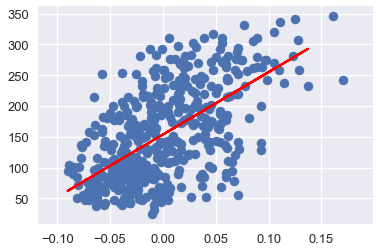

In [36]:
import seaborn as sns
plt.scatter(bmi, prog)

plt.plot(bmi_test, best_model_d.coef_*bmi_test + best_model_d.intercept_, '-r')